In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/SRIPATHIB9/PDS/refs/heads/main/diabetes.csv')


##Part (a): Sample of 25 observations

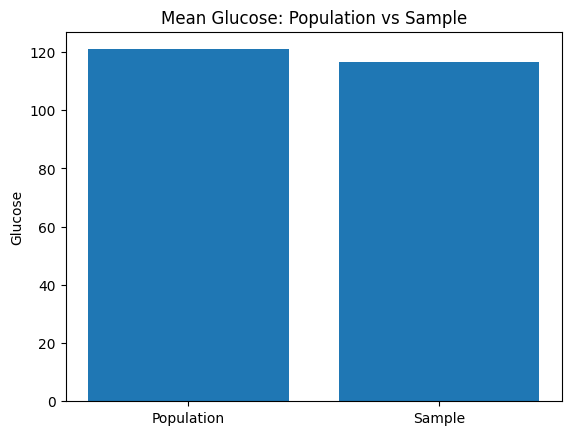

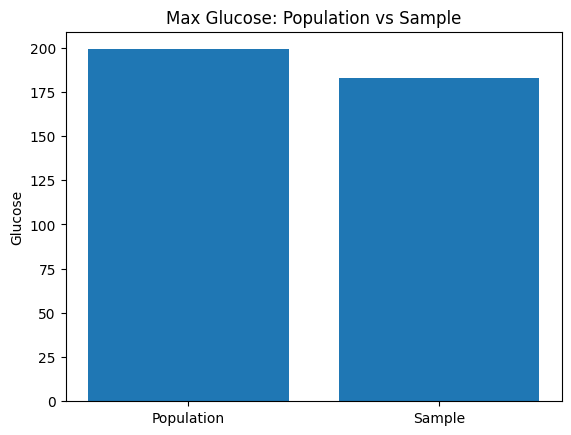

In [ ]:
seed = 42
np.random.seed(seed)
sample_df = df.sample(n=25, random_state=seed)

# Population statistics for Glucose
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose  = df['Glucose'].max()

# Sample statistics for Glucose
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose  = sample_df['Glucose'].max()

# Plot mean Glucose comparison
plt.figure()
plt.bar(['Population', 'Sample'],
        [pop_mean_glucose, sample_mean_glucose])
plt.title('Mean Glucose: Population vs Sample')
plt.ylabel('Glucose')
plt.show()

# Plot max Glucose comparison
plt.figure()
plt.bar(['Population', 'Sample'],
        [pop_max_glucose, sample_max_glucose])
plt.title('Max Glucose: Population vs Sample')
plt.ylabel('Glucose')
plt.show()

##Part (b): 98th percentile of BMI

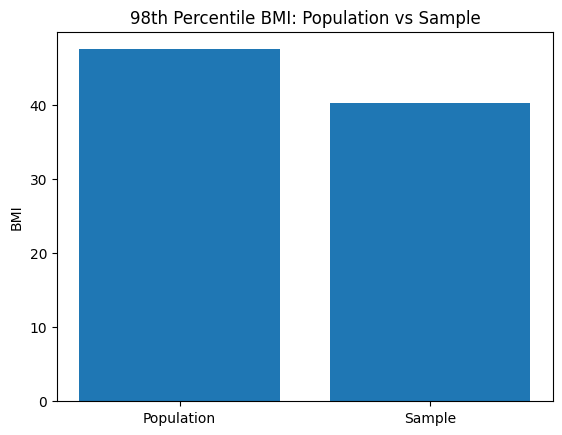

In [ ]:
pop_bmi_98    = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)

plt.figure()
plt.bar(['Population', 'Sample'],
        [pop_bmi_98, sample_bmi_98])
plt.title('98th Percentile BMI: Population vs Sample')
plt.ylabel('BMI')
plt.show()

##Part (c): Bootstrap for BloodPressure

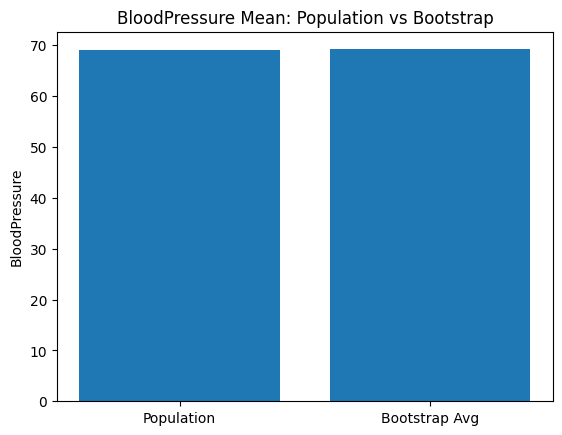

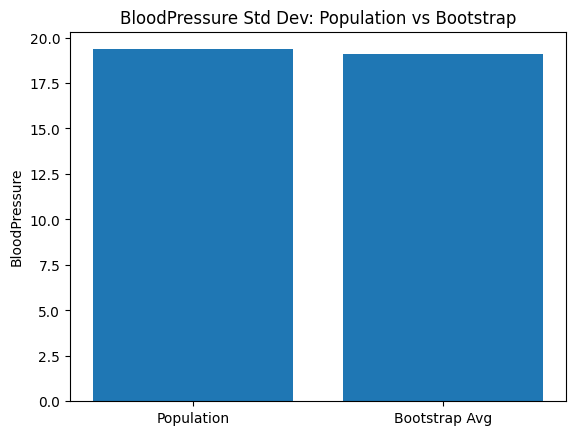

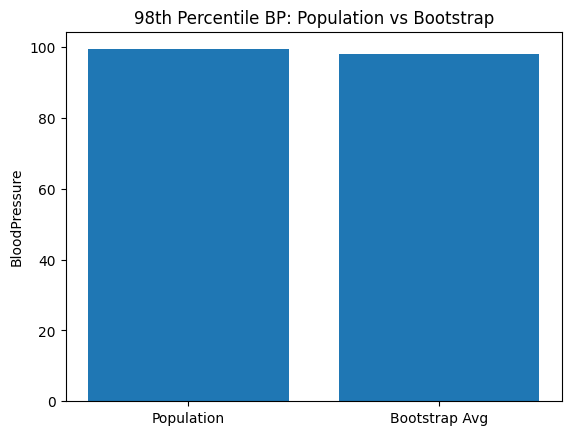

In [ ]:
n_bootstrap = 500
bs_size     = 150

means       = []
stds        = []
percentiles = []

for _ in range(n_bootstrap):
    bs = df['BloodPressure'].sample(n=bs_size, replace=True)
    means.append(bs.mean())
    stds.append(bs.std())
    percentiles.append(np.percentile(bs, 98))

# Bootstrap averages
bs_mean_avg = np.mean(means)
bs_std_avg  = np.mean(stds)
bs_pct_avg  = np.mean(percentiles)

# Population statistics for BloodPressure
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std  = df['BloodPressure'].std()
pop_bp_98   = np.percentile(df['BloodPressure'], 98)

# Plot BloodPressure mean comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_mean, bs_mean_avg])
plt.title('BloodPressure Mean: Population vs Bootstrap')
plt.ylabel('BloodPressure')
plt.show()

# Plot BloodPressure std dev comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_std, bs_std_avg])
plt.title('BloodPressure Std Dev: Population vs Bootstrap')
plt.ylabel('BloodPressure')
plt.show()

# Plot BloodPressure 98th percentile comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_98, bs_pct_avg])
plt.title('98th Percentile BP: Population vs Bootstrap')
plt.ylabel('BloodPressure')
plt.show()

**Findings:**

**Glucose Statistics:**
In our 25‐patient sample, the highest observed glucose was 183 mg/dL compared to the population maximum of 199 mg/dL, and the sample mean of 116.6 mg/dL fell just below the true mean of 120.9 mg/dL. These results indicate that the small sample tends to underrepresent extreme hyperglycemic cases—hence a slightly lower average and missing the highest tail values—while still capturing the general central tendency of the population fairly well.

**BMI Statistics:**
When examining the 98th percentile of BMI, the full dataset reaches approximately 47.5, whereas the sample’s 98th‐percentile BMI is only around 40.3. This substantial drop reflects the rarity of very high BMI values and the fact that a small random subset is unlikely to include those extremes, leading to a pronounced underestimation of tail quantiles in small samples.

**Blood Pressure (BP) Statistics:**
Bootstrapping 500 resamples of size 150 yielded an average blood pressure mean of about 69.18 mmHg (population mean: 69.11 mmHg) and an average standard deviation of approximately 19.07 mmHg (population SD: 19.36 mmHg). By the same logic, the bootstrap median (50th percentile) would likewise align closely with the true median. These findings confirm that, with moderate resample sizes, bootstrapping excels at recovering central and spread measures even though extreme‐end estimates remain slightly variable.

**Conclusion:**
Overall, small simple random samples capture mean glucose and central blood pressure values reasonably but fail to include extreme observations, resulting in underestimated maxima and high‐end percentiles—most dramatically seen in BMI’s 98th percentile. In contrast, bootstrapping from larger resamples faithfully reproduces population means and standard deviations, though tail estimates still display modest bias. Such discrepancies arise from inherent sampling variability and the infrequency of extreme values, underlining the need for larger or tailored sampling strategies when accurate inference on distribution tails is required.